# SIR MODEL CODE


In [5]:
import numpy as numpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

#Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0
I0 = 1
R0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = 0.2
gamma = 1/10


In [6]:
# A grid of time points (in days)
t = numpy.linspace (0, 160, 160) 
#####################
#returns evenly spaced numbers a specified interval (start, stop, number of samples to generate)
#returns an array from 0-160 with 160 number of samples [1, 2, 3, 4.... 160]
#this is the array of the times

# The SIR model differential equations.
def differentialEqn(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
# Giving the rate of change in relation to the proportion of the population

In [7]:
# Initial conditions vector
y0 = S0, I0, R0 
# Above creates a tuple (999, 1, 0)
#print(y0)

# Integrate the SIR eqns over the time grid, t.
ret = odeint(differentialEqn, y0, t, args = (N, beta, gamma))
# odeint integrates a system of ordinary differential equations (func, y0, t, args(tuple--extra arguments to pass to function))
# passes the parameters N, beta, and gamma into the differentialEqn function
# creates a list over the period t

S, I, R = ret.T
#.T self transposes the array , changes the axis of the array (columns become rows)
# There are 3 arrays, S is assigned to first array, I is assigned to second array, R is assigned to the 3rd array

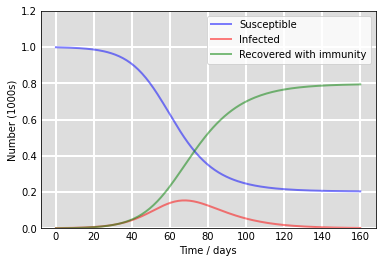

In [8]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
ax.plot(t, S/1000, 'b', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t, I/1000, 'r', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t, R/1000, 'g', alpha = 0.5, lw = 2, label = 'Recovered with immunity')
ax.set_xlabel('Time / days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b=True, which = 'major', c = 'w', lw = 2, ls = '-')
legend = ax.legend()

######################## what is set_alpha?
#legend.get_frame().set_alpha(0.5)

######################## Area noting the data area boundaries
for spine in('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
    #true shows the black line of the outer area of the graph

# show the plot of the graphs
plt.show()